### Download Dataset

To get FMNIST dataset, we can easily download the data because the data has been published online

In [0]:
!mkdir data
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/fashion’: File exists
--2019-08-08 15:10:48--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.158
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.73.158|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  12.0MB/s    in 2.1s    

2019-08-08 15:10:50 (12.0 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-08-08 15:10:51--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazo

### Import Dataset

Import the FMNIST dataset into a variable

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets('data/fashion',one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


### Data Analysis

Before starting to the next stage, it would be nice if we look at the form of the dataset we will use. First, we can examine the dimensions and scale of the dataset we will use.

In [0]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=data.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=data.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=data.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=data.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


Based on the above output, we can see that the dataset we will use has the following size :

- for training data using 55,000 data samples
- for testing data using 10,000 data samples
- for data validation using 5000 data samples

which has a vector dimension of 784 or 28x28 pixels. Each data has an association label consisting of 10 classes

In [0]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

In addition, let's look at the images in the dataset:

Text(0.5, 1.0, '(Label: Ankle boot)')

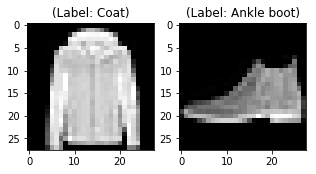

In [0]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(data.train.images[0], (28,28))
curr_lbl = np.argmax(data.train.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(data.test.images[0], (28,28))
curr_lbl = np.argmax(data.test.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

### Data Matrix

The data that we will use has a measurement between 0 and 1, to prove it, let's show the matrix of each image and we display the min and max values ​​of the image.

In [0]:
data.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.17254902,
       0.49803925, 0.7137255 , 0.7254902 , 0.6313726 , 0.47058827,
       0.21568629, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16470589, 0.77647066, 0.9843138 , 1.        , 0.9843138 ,
       0.97647065, 0.9686275 , 1.        , 0.98823535, 0.83921

In [0]:
np.max(data.train.images[0])

1.0

In [0]:
np.min(data.train.images[0])

0.0

Let's reshape the image so that it's 28 x 28 x 1, where the input image is 28 pixels by 28 pixels, 1 channel (gray scale). In this case, the first dimension is the number of the set of images, and can be any size (so we set it to -1). The second and third dimensions are width and height, and the last is the image channel.

In [0]:
# Reshape training and testing image for input
train_X = data.train.images.reshape(-1, 28, 28, 1)
test_X = data.test.images.reshape(-1,28,28,1)

In [0]:
train_X.shape, test_X.shape

((55000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
# Reshape training and testing image for output
train_y = data.train.labels
test_y = data.test.labels

In [0]:
train_y.shape, test_y.shape

((55000, 10), (10000, 10))

## Deep Learning

You'll use three convolutional layers:

- The first layer will have 32-3 x 3 filters,
- The second layer will have 64-3 x 3 filters and
- The third layer will have 128-3 x 3 filters.
In addition, there are three max-pooling layers each of size 2 x 2.![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1512486717/fashion-mnist-architecture_htbpsz.png)

Define training iteration

In [0]:
training_iters = 50 
learning_rate = 0.001 
batch_size = 128

### First parameter

Create general parameters for the initial parameter model

In [0]:
# MNIST data input (img shape: 28*28)
n_input = 28

# MNIST total classes (0-9 digits)
n_classes = 10

### Input and Output

create parameters for input and output

In [0]:
#both placeholders are of type float
x = tf.placeholder("float", [None, 28,28,1])
y = tf.placeholder("float", [None, n_classes])

### Creating wrappers for simplicity

In your network architecture model, you will have multiple convolution and max-pooling layers. In such cases, it's always a better idea to define convolution and max-pooling functions, so that you can call them as many times you want to use them in your network.

In [0]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) 

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

After you have defined the conv2d and maxpool2d wrappers, now you can now define your weights and biases variables. So, let's get started!

In [0]:
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

Now, it's time to define the network architecture

In [0]:
def conv_net(x, weights, biases):  

    # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.
    conv3 = maxpool2d(conv3, k=2)



    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

### Loss and Optimizer Nodes

You will start with constructing a model and call the conv_net() function by passing in input x, weights and biases.

In [0]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

W0808 15:24:16.028623 140545727846272 deprecation.py:323] From <ipython-input-30-989f812044df>:3: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Evaluate Model Node

To test your model, let's define two more nodes: correct_prediction and accuracy.

In [0]:
#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Remember that your weights and biases are variables and that you have to initialize them before you can make use of them.

In [0]:
# Initializing the variables
init = tf.global_variables_initializer()

### Training and Testing the Model

When you train and test your model in TensorFlow, you go through the following steps:
- You start off with launching the graph. 
- Then, you run the session, which will execute the variables that were initialized in the previous step and evaluates the tensor.
- Next, you define a for loop that runs for the number of training iterations you had specified in the beginning.
- You will then input the images based on the batch size you pass in batch_x and their respective labels in batch_y.
- now you feed the placeholders x and y the actual data in a dictionary and run the session by passing the cost and the accuracy that you had defined earlier.
- You can print the loss and training accuracy after each epoch (training iteration) is completed.

In [0]:
with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()

Iter 0, Loss= 0.300235, Training Accuracy= 0.88281
Optimization Finished!
Testing Accuracy: 0.85160
Iter 1, Loss= 0.208059, Training Accuracy= 0.91406
Optimization Finished!
Testing Accuracy: 0.88160
Iter 2, Loss= 0.167542, Training Accuracy= 0.93750
Optimization Finished!
Testing Accuracy: 0.89280
Iter 3, Loss= 0.157450, Training Accuracy= 0.93750
Optimization Finished!
Testing Accuracy: 0.89550
Iter 4, Loss= 0.141209, Training Accuracy= 0.94531
Optimization Finished!
Testing Accuracy: 0.89700
Iter 5, Loss= 0.140848, Training Accuracy= 0.95312
Optimization Finished!
Testing Accuracy: 0.89690
Iter 6, Loss= 0.128928, Training Accuracy= 0.96094
Optimization Finished!
Testing Accuracy: 0.90050
Iter 7, Loss= 0.120609, Training Accuracy= 0.95312
Optimization Finished!
Testing Accuracy: 0.90210
Iter 8, Loss= 0.097009, Training Accuracy= 0.97656
Optimization Finished!
Testing Accuracy: 0.90170
Iter 9, Loss= 0.089080, Training Accuracy= 0.98438
Optimization Finished!
Testing Accuracy: 0.90430


Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

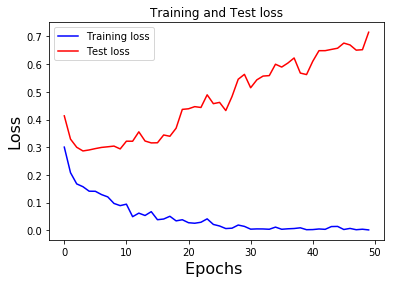

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

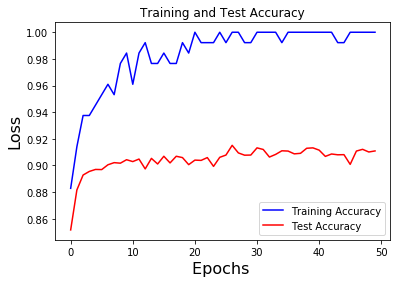

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()